Lab Assignment: Time-Series Prediction with RNN<br>
Objective:<br>
In this exercise, you will learn to implement a basic RNN model using Python and TensorFlow/Keras to predict future stock prices based on historical data.<br>
Dataset: Download the dataset: Stock Price Dataset - AAPL (Apple Inc.). https://www.kaggle.com/datasets/tarunpaparaju/apple-aapl-historical-stock-data
This dataset contains daily stock prices (open, high, low, close, volume) for Apple Inc. from 2005 to 2017.<br>
Exercise Steps:<br>

1. Data Preprocessing:<br>
o Load the dataset and focus on the 'Close' price column, as this will be your target variable for prediction.<br>
o Normalize the data (e.g., using Min-Max scaling to keep values between 0 and 1).<br>
o Split the dataset into a training set (80%) and a testing set (20%).<br>

2. Create Training Sequences:<br>
o Convert the 'Close' prices into a series of sequences for training.<br>
o Define a sequence length (e.g., 60 days), where each sequence will be used to predict the stock price for the next day.<br>

3. Build the RNN Model:<br>
o Define an RNN model with the following architecture:<br>
▪ An RNN layer with 50 units<br>
▪ A Dense layer with 1 unit (for regression output)<br>
o Use the mean squared error (MSE) loss function and the Adam optimizer.<br>

4. Train the Model:<br>
o Train the model on the training set for 50 epochs with a batch size of 32.<br>
o Use validation data to check for overfitting.<br>

5. Make Predictions:<br>
o Predict the stock prices on the test set and transform the results back to the original scale if normalization was applied.<br>
o Plot the predicted vs. actual stock prices to visualize the model’s performance.<br>

6. Evaluation:<br>
o Calculate the mean absolute error (MAE) and root mean squared error(RMSE) on the test set.<br>
o Discuss how well the model performed based on these metrics.

<b>Objective</b><br>
In this lab assignment, we’ll implement a Recurrent Neural Network (RNN) model in Python using TensorFlow/Keras to predict future stock prices of Apple Inc. (AAPL) based on historical data. This project involves data preprocessing, training sequence creation, model building, training, prediction, and evaluation.



In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


<b>STEP 1: DATA PRE-PROCESSING

<b>1.1</b> Loading the dataset

In [4]:
# Load the data
data = pd.read_csv('Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


<b>1.2</b> Cleaning and Normalizing the dataset

In [5]:
# Code to clean the 'Close' price column
data[' Close/Last'] = data[' Close/Last'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [9]:
df = data[[' Close/Last']]

In [10]:
# Code for normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)


The 'Close' price data may contain dollar signs and commas, which would prevent conversion to a numeric format. We remove these characters to allow successful data transformation.<br>
To prepare the data for training, we use Min-Max scaling to normalize the 'Close' prices between 0 and 1. This step standardizes the data, helping the model learn more effectively by keeping the values on a similar scale.

<b>1.3</b> Splitting into Training and Testing Sets

In [11]:
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len:]


Split the dataset into 80% training and 20% testing to ensure the model has enough data to learn while reserving a portion for evaluation.

<b>STEP 2: CREATE TRAINING SEQUENCES

In [12]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences
seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


For time-series forecasting, we convert the 'Close' prices into sequences of 60 days, where each sequence (60 consecutive prices) will be used to predict the stock price for the following day. This sequence length enables the model to learn from past trends.

<b>STEP 3: BUILD THE RNN MODEL

<b>What is an RNN Model?</b><br>
A Recurrent Neural Network (RNN) is a type of artificial neural network designed to recognize patterns in sequential data, such as time-series data, speech, or text. Unlike traditional neural networks, RNNs have connections that loop back on themselves, allowing them to maintain a memory of previous inputs. This memory aspect makes RNNs particularly useful for tasks that depend on the order of inputs over time.<br>

Key Characteristics of RNNs:<br>
1. Sequential Memory: RNNs can store information about previous inputs through hidden states, enabling the network to retain context over time. This is especially valuable for predicting stock prices, where today’s price depends on recent trends.
2. Time-Dependency: Because of the recurrent connections, RNNs can analyze sequences where each data point is related to the preceding one, such as the stock prices over consecutive days.<br>

Why RNNs are Useful for Stock Prediction:<br>
1. Temporal Patterns: Stock prices have sequential dependencies, meaning past prices influence future prices. RNNs are designed to learn such temporal patterns.<br>
2. Historical Context: The RNN’s ability to remember past inputs helps in forecasting, as it can capture the historical context over a sequence length (e.g., 60 days) to predict the next price.


<b>3.1</b> Build the RNN Architecture

In [ ]:
model = Sequential([
    SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])


c:\Users\satch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


We define a basic RNN architecture for time-series prediction:<br>

RNN Layer: The RNN layer with 50 units allows the model to retain information from previous time steps, capturing the sequential nature of the data.<br>
Dense Layer: A Dense layer with 1 unit is used as the output layer for predicting a single value (next-day stock price).

<b>3.2</b> Compile the Model

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')


We then compile the model with the Mean Squared Error (MSE) loss function, which is appropriate for regression tasks, and the Adam optimizer, which is widely used for its adaptive learning rate.

<b>STEP 4: TRAIN THE MODEL

In [16]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0044 - val_loss: 4.9806e-05
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4919e-04 - val_loss: 4.3305e-05
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9007e-04 - val_loss: 4.5323e-05
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1448e-04 - val_loss: 3.5248e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5756e-04 - val_loss: 3.0689e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4199e-04 - val_loss: 3.5745e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.2158e-04 - val_loss: 2.4015e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.1547e-04 - val_loss: 2.3561e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.2101e-04 - val_loss: 2.0065e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.1779e-04 - val_loss: 2.6934e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.2118e-04 - val

We train the model on the training data for 50 epochs with a batch size of 32, and validate on the test data to monitor overfitting. During training, the model adjusts its weights to minimize the error in predicting stock prices.

<b>STEP 5: PREDICTIONS

In [17]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Using the trained model, we predict the stock prices on the test set. Since the predictions were scaled during preprocessing, we reverse the scaling to transform them back to the original stock price range. This step provides realistic predictions that can be compared to the actual prices.

<b>STEP 6: VISUALIZING RESULTS

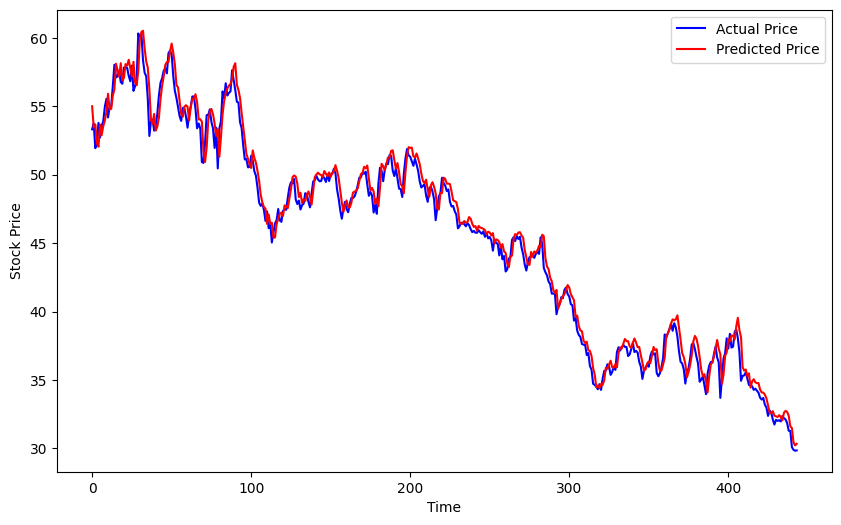

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test_scaled, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


We then plot the predicted vs. actual stock prices to visualize the model's performance.

<b>STEP 7: EVALUATION

In [ ]:
mae = mean_absolute_error(y_test_scaled, predictions)
rmse = np.sqrt(mean_squared_error(y_test_scaled, predictions))
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 0.7063670523772368
Root Mean Squared Error: 0.9119608220098668


To evaluate model performance, we calculate:<br>
Mean Absolute Error (MAE): Measures the average absolute error between predictions and actual values.<br>
Root Mean Squared Error (RMSE): Provides a measure of prediction accuracy by penalizing larger errors more heavily.<br>

Lower values of MAE and RMSE indicate better model performance, giving us insights into how well the model has captured the stock's behavior.

<b>Discussion</b><br>
Based on the evaluation metrics, we analyze the model's performance. If MAE and RMSE are reasonably low, it indicates that the model was able to approximate Apple's stock price trends effectively.